# Example of interactive use

In [1]:
import pandas as pd
import numpy as np

from ramprate.build_features import process_subset
from ramprate.load_dataset import load_epa_crosswalk, load_epacems
from ramprate.visualize import plot_component_max_ramp

In [2]:
pd.options.display.max_rows = 50

In [3]:
states = ['FL'] # for all states, set to None
years = [2016] # for all years, set to None
# the default value for columns picks an appropriate subset.
# columns = <subset> # for all columns, set to None
cems = load_epacems(states=states, years=years) # , columns=columns)
cems.set_index(
            ["unit_id_epa", "operating_datetime_utc"],
            drop=False,
            inplace=True,
        )
cems.sort_index(inplace=True)

In [4]:
crosswalk = load_epa_crosswalk()

In [5]:
outputs = process_subset(cems, crosswalk)

## Visualize an individual component

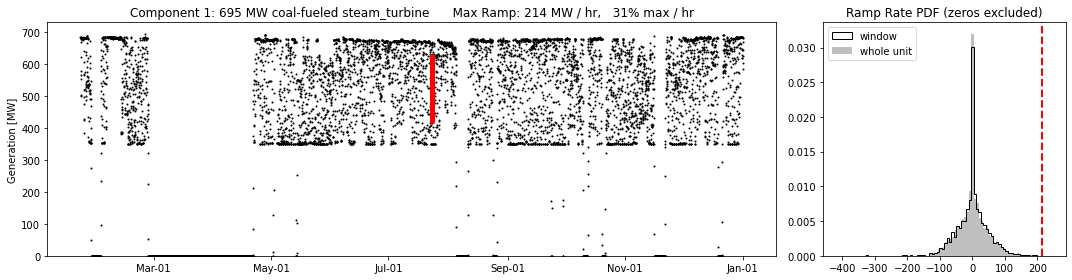

In [6]:
component_id=1
plot_component_max_ramp(component_id=component_id, window_hours=8760, cdf=False, **outputs)

### Same as above but zoomed in (small window size)

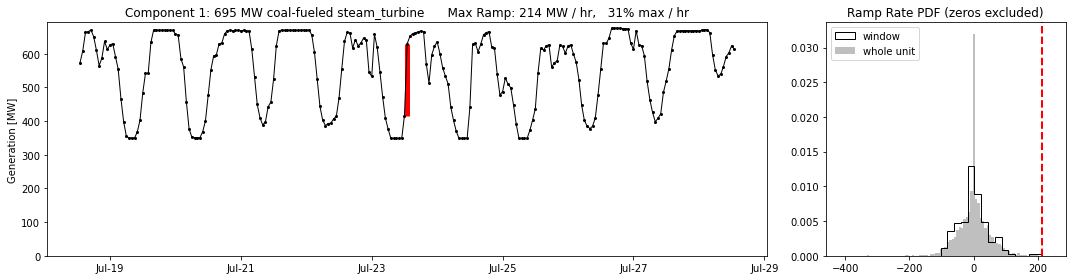

In [7]:
plot_component_max_ramp(component_id=component_id, window_hours=10*24, cdf=False, **outputs)

## Show each output

In [8]:
item = iter(outputs.items())

In [9]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

component_aggs has shape (233, 18)


,sum_of_max_gross_load_mw,max_of_sum_gross_load_mw,max_ramp,min_ramp,idxmax_ramp,idxmin_ramp,max_abs_ramp,idxmax_abs_ramp,EIA_UNIT_TYPE,capacity_CAMD,capacity_EIA,simple_CAMD_FUEL_TYPE_via_capacity,simple_EIA_FUEL_TYPE_via_capacity,simple_EIA_UNIT_TYPE,ramp_factor_CAMD,ramp_factor_EIA,ramp_factor_sum_max,ramp_factor_max_sum
component_id,,,,,,,,,,,,,,,,,,
70,535.0,535.0,137.0,-128.0,2016-02-26 11:00:00+00:00,2016-04-04 05:00:00+00:00,137.0,2016-02-26 11:00:00+00:00,"(CA, CT)",647.0,809.1,gas,gas,combined_cycle,0.211747,0.169324,0.256075,0.256075
101,640.0,640.0,290.0,-303.0,2016-11-13 03:00:00+00:00,2016-11-13 00:00:00+00:00,303.0,2016-11-13 00:00:00+00:00,"(CA, CT)",416.5,619.7,gas,gas,combined_cycle,0.727491,0.488946,0.473438,0.473438
229,1350.0,1223.0,195.0,-209.0,2016-10-07 14:00:00+00:00,2016-10-06 18:00:00+00:00,209.0,2016-10-06 18:00:00+00:00,"(CA, CT)",1352.0,1421.0,gas,gas,combined_cycle,0.154586,0.147080,0.154815,0.170891


In [10]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

key_map has shape (433, 39)


,component_id,plant_id_eia,unitid,unit_id_epa,SEQUENCE_NUMBER,CAMD_STATE,CAMD_FACILITY_NAME,CAMD_PLANT_ID,CAMD_UNIT_ID,CAMD_GENERATOR_ID,...,EIA_RETIRE_YEAR,PLANT_ID_CHANGE_FLAG,MOD_EIA_PLANT_ID,MOD_EIA_BOILER_ID,MOD_EIA_GENERATOR_ID_BOILER,MOD_EIA_GENERATOR_ID_GEN,MATCH_TYPE_GEN,MATCH_TYPE_BOILER,simple_CAMD_FUEL_TYPE,simple_EIA_FUEL_TYPE
219,110,6042,MTCT3A,88110,2705.0,FL,Manatee,6042,MTCT3A,3,...,0.0,0.0,6042.0,3A,3,3,3_1_Generator (generators) match on plant and ...,6_1_EnviroAssoc (boilers and generators) match...,gas,gas
338,176,617,GPE10,90142,436.0,FL,Port Everglades,617,GPE10,10,...,2016.0,0.0,617.0,NaN,NaN,10,3_1_Generator (generators) match on plant and ...,NaN,gas,gas
25,8,612,PFM3B,412,394.0,FL,Fort Myers,612,PFM3B,CT2,...,0.0,0.0,612.0,NaN,NaN,CT2,3_1_Generator (generators) match on plant and ...,NaN,gas,gas


In [11]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

component_timeseries has shape (1800672, 3)


,,gross_load_mw,exclude_ramp,ramp
component_id,operating_datetime_utc,,,
47,2016-07-03 03:00:00+00:00,101.0,False,-8.0
111,2016-11-03 10:00:00+00:00,166.0,False,26.0
96,2016-01-04 12:00:00+00:00,0.0,False,0.0


In [12]:
k, v = next(item)
print(f"{k} has shape {v.shape}")
v.sample(3)

cems has shape (2573664, 11)


,,plant_id_eia,unitid,operating_datetime_utc,gross_load_mw,unit_id_epa,hours_from_startup,hours_to_shutdown,hours_distance,component_id,simple_EIA_UNIT_TYPE,exclude_ramp
unit_id_epa,operating_datetime_utc,,,,,,,,,,,
90112,2016-10-05 03:00:00+00:00,10672,CBB,2016-10-05 03:00:00+00:00,0.0,90112,6694.0,2137.0,2137.0,100,NaN,False
90062,2016-07-21 02:00:00+00:00,667,GT3,2016-07-21 02:00:00+00:00,0.0,90062,56.0,59.0,56.0,158,gas_turbine,False
90417,2016-09-26 22:00:00+00:00,634,4C,2016-09-26 22:00:00+00:00,283.0,90417,259.0,270.0,259.0,226,combined_cycle,False
